In [1]:
from lammps import Lammps

import numpy as np
from math import pi

In [2]:
lengths = (4.2, 4.2, 4.2)
angles = (pi/2, pi/2, pi/2)
elements = [{'symbol': 'Mg', 'mass': 24.3}, {'symbol': 'O', 'mass': 16.0}]
symbol_indicies = {element['symbol']: i+1 for i, element in enumerate(elements)}
symbols = ['Mg', 'Mg', 'Mg', 'Mg', 'O', 'O', 'O', 'O']

positions = np.array([
    (0, 0, 0), (2.1, 2.1, 0), (2.1, 0, 2.1), (0, 2.1, 2.1), # Mg
    (2.1, 0, 0), (0, 2.1, 0), (0, 0, 2.1), (2.1, 2.1, 2.1)  # O
]).reshape(-1, 3)

# Initialize Lammps

In [3]:
lmp = Lammps(units='metal')
lmp.command('atom_modify map yes id yes sort 10000 5.0')

'atom_modify'

# Create Lattice and Set Number Atom Types

In [4]:
lmp.box.from_lattice_const(len(elements), lengths, angles)

In [5]:
print(lmp.box.lengths)
print(lmp.box.angles)
print([(_.index, _.mass) for _ in lmp.system.atom_types])

(4.2, 4.2, 4.2)
(1.5707963267948966, 1.5707963267948966, 1.5707963267948966)
[(1, 6.93144033682577e-310), (2, 6.93144116707186e-310)]


# Set Types Mass

In [6]:
for element, atom_type in zip(elements, lmp.system.atom_types):
    atom_type.mass = element['mass']

In [7]:
print([(_.index, _.mass) for _ in lmp.system.atom_types])

[(1, 24.3), (2, 16.0)]


# Create Atoms Set Positions and Velocities

other properties must be set using convenience methods `lammps.system.forces`, `lammps.system.charges`, etc.

Or use `lmp.system.global_scatter_property_ordered('property', values)`

In [9]:
atom_types = np.array([symbol_indicies[symbol] for symbol in symbols], dtype=np.intc)
print(atom_types)
# velocities = np.random.random((len(atom_types), 3))
print('positions before', positions)
# print('velocities before', velocities)
print('total atoms before', lmp.system.total)
lmp.system.create_atoms(atom_types, positions)

[1 1 1 1 2 2 2 2]
positions before [[0.  0.  0. ]
 [2.1 2.1 0. ]
 [2.1 0.  2.1]
 [0.  2.1 2.1]
 [2.1 0.  0. ]
 [0.  2.1 0. ]
 [0.  0.  2.1]
 [2.1 2.1 2.1]]
total atoms before 0


In [17]:
print('Initialized Values')
print(lmp.system.total)
print(lmp.system.local_total)
print(lmp.system.tags)
print(lmp.system.types)
print(lmp.system.positions)
print(lmp.system.velocities)
print(lmp.system.forces)

Initialized Values
8
8
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]]
[[1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.10000000e+00 2.10000000e+00 0.00000000e+00]
 [2.10000000e+00 1.28587914e-16 2.10000000e+00]
 [4.20000000e+00 2.10000000e+00 2.10000000e+00]
 [2.10000000e+00 0.00000000e+00 0.00000000e+00]
 [1.28587914e-16 2.10000000e+00 0.00000000e+00]
 [1.28587914e-16 1.28587914e-16 2.10000000e+00]
 [2.10000000e+00 2.10000000e+00 2.10000000e+00]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


# Initialize Simulation

In [19]:
script = """
pair_style  buck 10
pair_coeff 1 1 1309362.2766468062 0.104 0.0
pair_coeff 1 2 9892.357 0.20199 0.0
pair_coeff 2 2 2145.7345 0.3 30.2222

fix 1 all nve
"""
for line in script.split('\n'):
    lmp.command(line)

In [26]:
# Lets add some velocity to simulation
lmp.system.velocities = np.random.random((lmp.system.total, 3))

In [27]:
# Lets run the simulation for 100 timesteps
lmp.run(100)

# Access resulting positions, velocities, forces from simulation 

In [28]:
lmp.system.positions

array([[ 0.02416836,  4.20665687,  4.29418485],
       [ 2.14114079,  2.10697326,  0.02623352],
       [ 2.18292249,  4.21339586,  2.08737708],
       [ 0.02697348,  2.20355666,  2.20980006],
       [ 2.13045072,  0.0057455 , -0.00843564],
       [ 4.24109851,  2.10741066,  0.10669168],
       [ 4.27956304,  0.09427366,  2.19172269],
       [ 2.13363423,  2.11464131,  2.12346946]])

In [29]:
lmp.system.velocities

array([[-0.28932646, -0.53778396,  1.8906317 ],
       [ 0.5624268 , -0.1872327 , -0.34991299],
       [ 1.66029713, -0.27478376, -1.37768366],
       [-0.17093453,  2.2908308 ,  2.00484875],
       [ 0.09228925, -0.22776102, -0.94498033],
       [ 0.31159208, -0.42615074,  1.86091442],
       [ 1.33163543,  2.25297367,  1.15149833],
       [ 0.09613548, -0.35587874,  0.07930761]])

In [30]:
lmp.system.forces

array([[-0.01016567, -0.11056548,  0.08993491],
       [ 0.02562065, -0.02890407, -0.10467185],
       [ 0.09541703, -0.08349161, -0.13366652],
       [ 0.00198034,  0.12169818,  0.09979674],
       [-0.07252777, -0.00832775, -0.05886279],
       [-0.00233496,  0.00441106,  0.0413087 ],
       [ 0.04005666,  0.10649654,  0.02793138],
       [-0.07804628, -0.00131688,  0.03822942]])

# Lets Make a Movie of the simluation

not sure if this really belongs... but it shows some of the possibilities

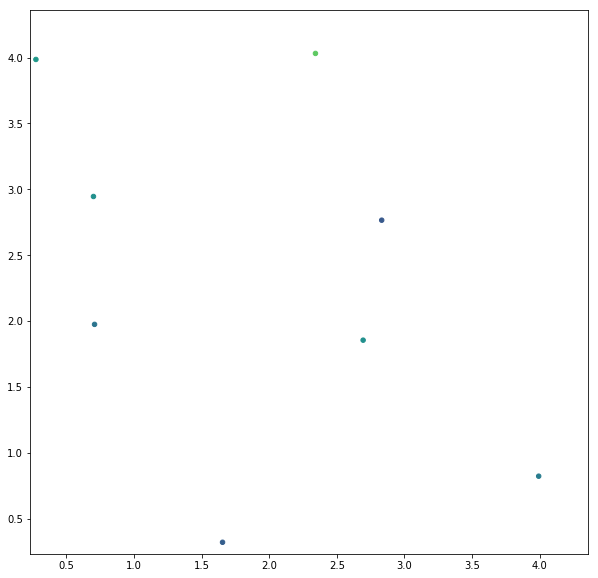

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML

c = np.linalg.norm(lmp.system.velocities, axis=1)
c_min = np.min(c)
c_max = np.max(c)

def main():
    numframes = 100

    fig = plt.figure()
    fig.set_size_inches((10, 10))
    x = lmp.system.positions[:, 0].reshape(-1, 1)
    y = lmp.system.positions[:, 0].reshape(-1, 1)
    c = np.linalg.norm(lmp.system.velocities, axis=1).reshape(-1, 1)
    c_norm = (np.clip(c, c_min, c_max) - c_min) / (c_max - c_min)
    scat = plt.scatter(x, y, c=c_norm, s=20)

    ani = animation.FuncAnimation(fig, update_plot, frames=range(numframes),
                                  fargs=(scat,))
    return HTML(ani.to_html5_video())

def update_plot(i, scat):
    lmp.run(3)
    x = lmp.system.positions[:, 0].reshape(-1, 1)
    y = lmp.system.positions[:, 1].reshape(-1, 1)
    c = np.linalg.norm(lmp.system.velocities, axis=1)
    c_norm = (np.clip(c, c_min, c_max) - c_min) / (c_max - c_min)
    diff = np.concatenate((x, y), axis=1)
    scat.set_array(c_norm)
    scat.set_offsets(diff)
    return scat,

main()